# Statistical mechanics of money

Simulate the statistical mechanics of money.

# Preliminaries

In [1]:
# load some packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.optimize import curve_fit

# Functions

In [2]:
def boltzmann_distribution(m, T):
  m = np.array(m)
  values = np.arange(0, max(m) + 1)
  C = 1 / np.sum(np.exp(-values / T))
  return values, C * np.exp(-values / T)

# Money Simulator V1

## Class

In [3]:
class MoneySimulator_v1:
  def __init__(self, num_agents, total_money, num_steps):

    # input checks
    if not isinstance(num_agents, int) or not isinstance(total_money, int):
      raise TypeError("Number of agents and total money must be integers.")
    if num_agents <= 0:
      raise ValueError("Number of agents must be positive.")
    if total_money < num_agents:
      raise ValueError("Total money must be at least equal to the number of agents.")
    if total_money % num_agents != 0:
      raise ValueError("Total money must be evenly divisible by the number of agents.")

    # assign class variables
    self.agents = [total_money // num_agents] * num_agents
    self.num_agents = num_agents
    self.total_money = total_money
    self.num_steps = num_steps
    self.temperature = total_money/num_agents

  def run_simulation(self):
    for _ in range(self.num_steps):
      a, b = random.sample(range(self.num_agents), 2)
      winner, loser = random.choice([(a, b), (b, a)])
      if self.agents[loser] > 0:
        self.agents[loser] -= 1
        self.agents[winner] += 1
    return self.agents

## Analysis

In [4]:
# run simulation
m = MoneySimulator_v1(num_agents=1000, 
                      total_money=1000,
                      num_steps=10000)
money_distribution = m.run_simulation()

In [5]:
# calculate boltzmann distribution
values, probabilities = boltzmann_distribution(m=np.unique(money_distribution), 
                                               T=m.temperature)

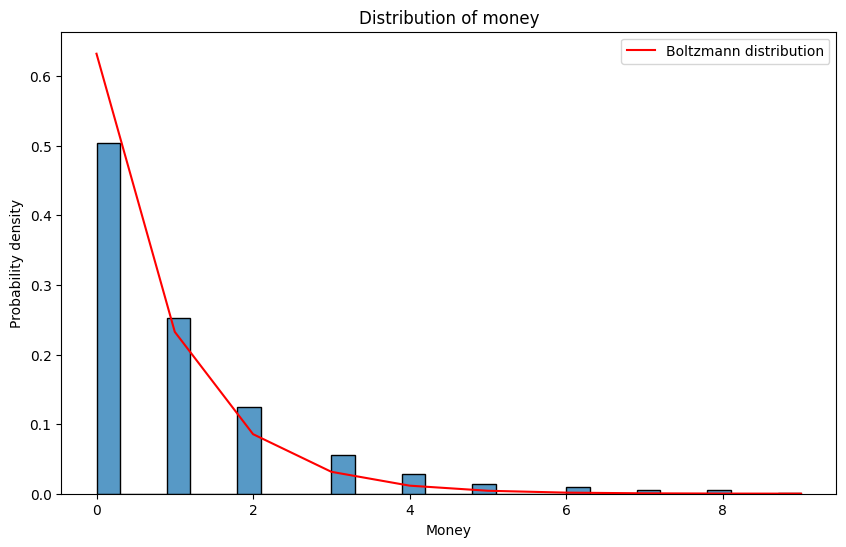

In [6]:
# plot distribution
plt.figure(figsize=(10, 6))

# histogram
sns.histplot(money_distribution, 
             kde=False, 
             stat="probability", 
             bins=30, 
             label="_nolegend_")

# plot boltzmann distribution
plt.plot(values, 
         probabilities, 
         color="red", 
         label="Boltzmann distribution")
plt.title("Distribution of money")
plt.xlabel("Money")
plt.ylabel("Probability density")
plt.legend()
plt.show()

# Money Simulator V2

## Class

In [7]:
class MoneySimulator_v2:
  def __init__(self, num_agents, total_money, num_steps):

    # input checks
    if not isinstance(num_agents, int) or not isinstance(total_money, int):
      raise TypeError("Number of agents and total money must be integers.")
    if num_agents <= 0:
      raise ValueError("Number of agents must be positive.")
    if total_money < num_agents:
      raise ValueError("Total money must be at least equal to the number of agents.")
    if total_money % num_agents != 0:
      raise ValueError("Total money must be evenly divisible by the number of agents.")

    # assign class variables
    self.agents = [total_money // num_agents] * num_agents
    self.num_agents = num_agents
    self.total_money = total_money
    self.num_steps = num_steps
    self.temperature = total_money/num_agents
    self.variances = []

  def run_simulation(self):
    for _ in range(self.num_steps):
      a, b = random.sample(range(self.num_agents), 2)
      winner, loser = random.choice([(a, b), (b, a)])
      if self.agents[loser] > 0:
        self.agents[loser] -= 1
        self.agents[winner] += 1
      self.variances.append(np.var(self.agents))
    return self.agents

## Analysis

In [8]:
# run simulation
m = MoneySimulator_v2(num_agents=1000, 
                      total_money=1000,
                      num_steps=10000)
money_distribution = m.run_simulation()

In [9]:
# calculate boltzmann distribution
values, probabilities = boltzmann_distribution(m=np.unique(money_distribution), 
                                               T=m.temperature)

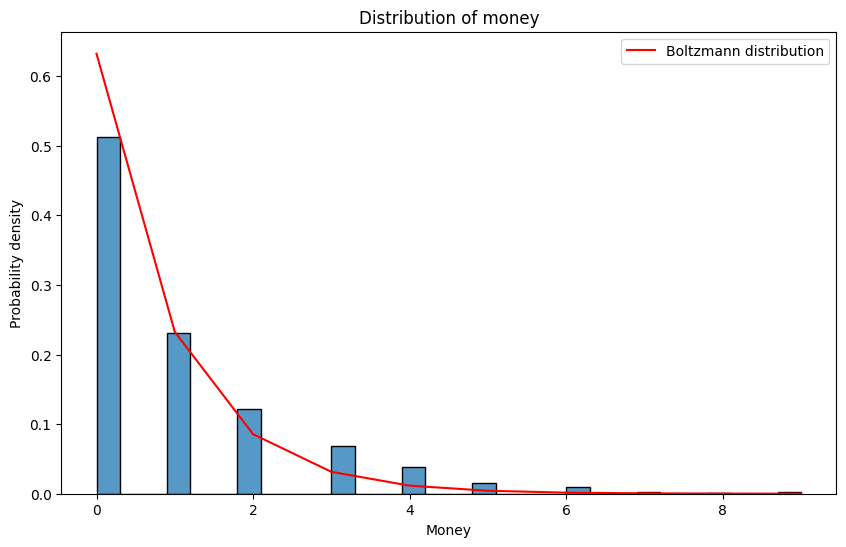

In [10]:
# plot distribution
plt.figure(figsize=(10, 6))

# histogram
sns.histplot(money_distribution, 
             kde=False, 
             stat="probability", 
             bins=30, 
             label="_nolegend_")

# plot boltzmann distribution
plt.plot(values, 
         probabilities, 
         color="red", 
         label="Boltzmann distribution")

# labels
plt.title("Distribution of money")
plt.xlabel("Money")
plt.ylabel("Probability density")

# add legend
plt.legend()

plt.show()

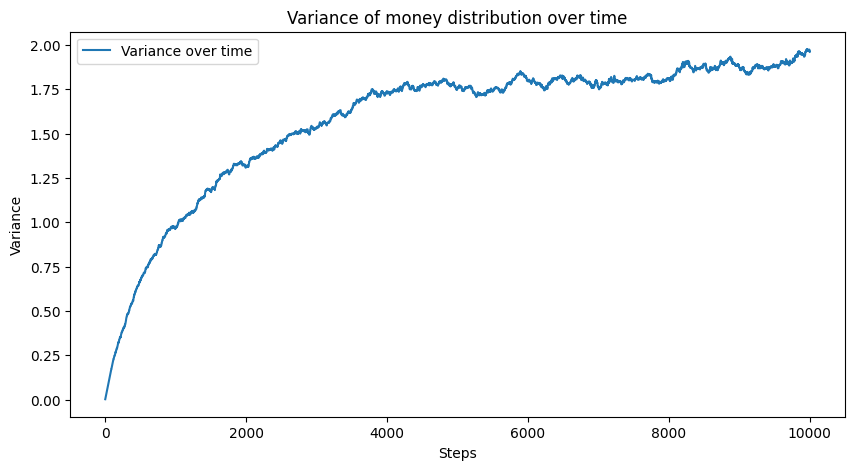

In [11]:
# plot variance over time
plt.figure(figsize=(10, 5))

# plot
plt.plot(m.variances, 
         label="Variance over time")

# labels
plt.xlabel("Steps")
plt.ylabel("Variance")
plt.title('Variance of money distribution over time')

# add legend
plt.legend()

plt.show()